In [ ]:
import sys
# Add the folder containing your module
sys.path.append(r"C:\Users\tasni\OneDrive\Desktop")  

🪐 Roman Space Telescope Keepout Map Generator 🪐

Enter target names (one per line).
When done, enter a blank line:
(You can enter as many targets as you want)



Target 1 (or press Enter to finish):  47 Uma 


  Added: 47 Uma


Target 2 (or press Enter to finish):  

Enter start date (YYYY-MM-DDTHH:MM:SS) [default: 2027-01-01T00:00:00]:  2027-01-01T00:00:00

Enter number of days (1-730) [default: 365]:  365

Enter time step in days (1-10) [default: 1]:  1



Computing keepout zones...
Computing pitch angles for all targets...
  Processing 1/1: 47 Uma


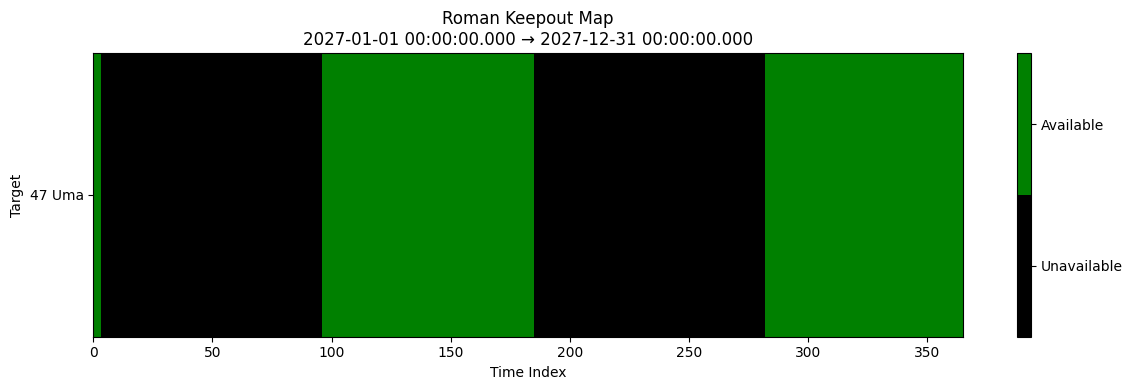

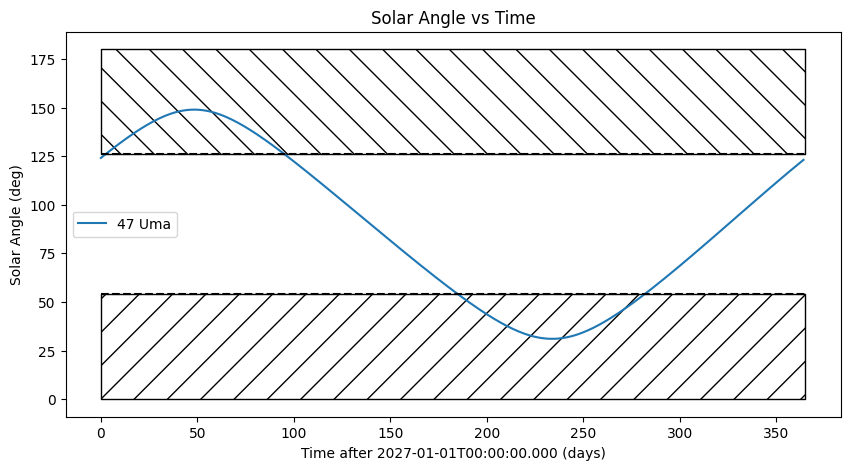

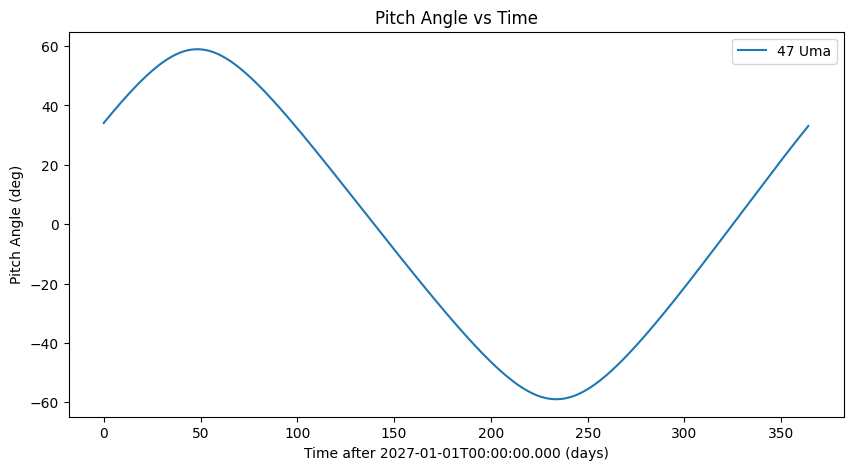

In [11]:
from roman_observability import (
    get_target_coords, 
    compute_keepout, 
    plot_keepout,
    plot_solar_angle,
    compute_roman_angles,
    plot_pitch
)
import matplotlib.pyplot as plt

def get_user_inputs():
    print("🪐 Roman Space Telescope Keepout Map Generator 🪐")
    print()
    
    # Get target names
    print("Enter target names (one per line).")
    print("When done, enter a blank line:")
    print("(You can enter as many targets as you want)")
    print()
    
    target_names = []
    while True:
        target = input(f"Target {len(target_names) + 1} (or press Enter to finish): ").strip()
        if not target:
            if len(target_names) == 0:
                print("No targets entered yet. Please enter at least one target.")
                continue
            break
        target_names.append(target)
        print(f"  Added: {target}")
        
    # Get start date
    start_date = input("\nEnter start date (YYYY-MM-DDTHH:MM:SS) [default: 2027-01-01T00:00:00]: ").strip()
    if not start_date:
        start_date = '2027-01-01T00:00:00'
    
    # Get number of days
    while True:
        days_str = input("\nEnter number of days (1-730) [default: 365]: ").strip()
        if not days_str:
            days = 365
            break
        try:
            days = int(days_str)
            if 1 <= days <= 730:
                break
            else:
                print("Please enter a value between 1 and 730.")
        except ValueError:
            print("Please enter a valid integer.")
    
    # Get time step
    while True:
        time_step_str = input("\nEnter time step in days (1-10) [default: 1]: ").strip()
        if not time_step_str:
            time_step = 1
            break
        try:
            time_step = int(time_step_str)
            if 1 <= time_step <= 10:
                break
            else:
                print("Please enter a value between 1 and 10.")
        except ValueError:
            print("Please enter a valid integer.")
    
    return target_names, start_date, days, time_step

def main():
    try:
        # Get user inputs
        target_names, start_date, days, time_step = get_user_inputs()
        
        # Get coordinates
        coords = get_target_coords(target_names)
        
        # Show which targets were found/not found
        found_targets = set(coords.keys())
        all_targets = set(target_names)
        not_found = all_targets - found_targets
        
        if not_found:
            print(f"Warning: Could not find coordinates for: {', '.join(not_found)}")
        
        if len(coords) == 0:
            print("Error: No valid targets found!")
            return
        
        # Compute keepout
        print("\nComputing keepout zones...")
        ts, keepout, solar_angles = compute_keepout(
            coords,
            start_date,
            days,
            time_step
        )
        
        # Compute pitch angles for all targets
        print("Computing pitch angles for all targets...")
        pitch_dict = {}
        for i, (name, coord) in enumerate(coords.items(), 1):
            print(f"  Processing {i}/{len(coords)}: {name}")
            _, _, _, pitch = compute_roman_angles(
                coord,
                start_date,
                days,
                time_step
            )
            pitch_dict[name] = pitch
        
        # Plot keepout map
        fig1, ax1 = plot_keepout(keepout, ts)
        plt.show()
        
        # Plot solar angles
        fig2, ax2 = plot_solar_angle(ts, solar_angles)
        plt.show()
        
        # Plot pitch angles
        fig3, ax3 = plot_pitch(ts, pitch_dict)
        plt.show()

        
    except Exception as e:
        print(f"\n Error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()